<a href="https://colab.research.google.com/github/951237/TIL/blob/master/TIL_%ED%8C%90%EB%8B%A4%EC%8A%A4_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0_191125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIL 판다스 191125

## 기초작업 191125

### 임포트 라이브러리

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 데이터프레임 만들기 - 타이타닉

In [0]:
df = sns.load_dataset('titanic')

#### 내용 확인 

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 전체적인 틀 확인

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 분석하기

### 성별 비율 확인 191125

#### 데이터 프레임 만들기 - 성별

In [0]:
df_sex = pd.DataFrame(df['sex'].value_counts())

In [21]:
df_sex

,sex
male,577
female,314


#### 그래프로 확인

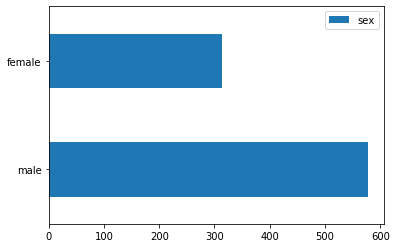

In [22]:
df_sex.plot(kind='barh')

### 생존자 확인 191125

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df_alive = pd.DataFrame(df['alive'].value_counts())
df_alive

,alive
no,549
yes,342


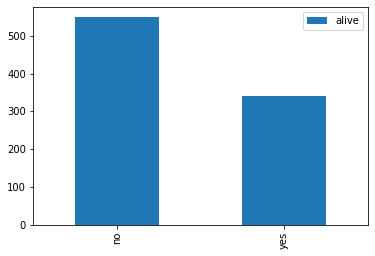

In [26]:
df_alive.plot(kind='bar')

### 클래스 확인 191125

In [28]:
df_class = pd.DataFrame(df['class'].value_counts())
df_class

,class
Third,491
First,216
Second,184


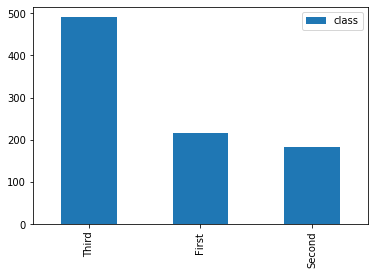

In [29]:
df_class.plot(kind='bar')

### 연령대 확인 191125

In [38]:
len(df['age'].unique())

89

#### 나이값이 없는 데이터 뽑아내기

In [49]:
df_age_nan = df[df['age'].isnull()]
df_age_nan

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [34]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

#### 나이대의 Nan값 정리하기

##### 데이터 프레임 인덱스 확인하기

In [53]:
df_age_nan.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

##### 데이터 프레임 인덱스로 데이터 삭제하기

In [55]:
df_age = df.drop(index=df_age_nan.index)
df_age.shape

(714, 15)

#### 나이를 연령대로 나누기

In [60]:
df_age['ct_age'] = (df_age['age']/10).apply(np.floor).astype(int) * 10
df_age.shape

(714, 16)

#### 연령대별 값 카운트 후 그래프 그리기

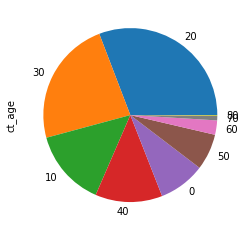

In [63]:
df_age['ct_age'].value_counts().plot(kind='pie')

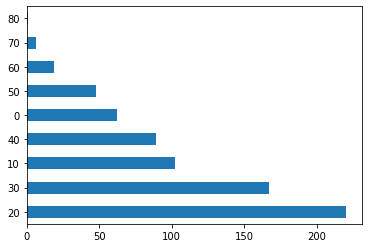

In [64]:
df_age['ct_age'].value_counts().plot(kind='barh')